In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
df=pd.read_csv("gym_members_exercise_tracking.csv") ##read file
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


In [66]:
df.info() ##provide summary information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [67]:
df.shape #specify numbers of rows and columns

(973, 15)

In [68]:
df.head(3) #return the first three rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71


In [69]:
df.tail(3) #return the last three rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542,Strength,28.8,3.5,2,1,33.38


In [70]:
df.loc[5]#location for index

Age                                  56
Gender                           Female
Weight (kg)                        58.0
Height (m)                         1.68
Max_BPM                             168
Avg_BPM                             156
Resting_BPM                          74
Session_Duration (hours)           1.59
Calories_Burned                    1116
Workout_Type                       HIIT
Fat_Percentage                     15.5
Water_Intake (liters)               2.7
Workout_Frequency (days/week)         5
Experience_Level                      3
BMI                               20.55
Name: 5, dtype: object

In [71]:
df.iloc[3] #retrieves the  row of the DataFrame using integer-location 

Age                                    25
Gender                               Male
Weight (kg)                          53.2
Height (m)                            1.7
Max_BPM                               190
Avg_BPM                               164
Resting_BPM                            56
Session_Duration (hours)             0.59
Calories_Burned                       532
Workout_Type                     Strength
Fat_Percentage                       28.8
Water_Intake (liters)                 2.1
Workout_Frequency (days/week)           3
Experience_Level                        1
BMI                                 18.41
Name: 3, dtype: object

In [72]:
##Filtering data, select obese individual(BMI>=30)
df2=df[df['BMI']>=30]
df2

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
7,40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808,Cardio,29.7,2.7,3,1,30.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,57,Male,96.1,1.74,199,144,54,1.21,862,Cardio,21.6,2.8,3,2,31.74
959,50,Male,95.4,1.61,173,133,50,1.16,764,Strength,21.5,3.6,4,2,36.80
962,57,Male,83.4,1.65,172,166,67,1.57,1290,HIIT,13.3,3.5,4,3,30.63
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


In [73]:
df[df['Workout_Type'].str.contains('Yoga')] #filters the DataFrame to include only the rows where the 'Workout_Type' column contains the substring 'Yoga'.

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
14,20,Male,117.7,1.81,196,161,54,1.35,1195,Yoga,26.4,3.3,3,2,35.93
22,50,Female,71.0,1.68,187,161,70,1.17,848,Yoga,33.1,2.5,2,1,25.16
23,29,Male,120.9,1.78,197,168,65,0.78,721,Yoga,28.1,3.4,2,1,38.16
25,42,Female,63.7,1.71,173,169,62,1.42,1080,Yoga,26.1,1.8,3,2,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,31,Female,76.7,1.62,174,127,74,1.39,883,Yoga,28.1,2.3,4,2,29.23
953,50,Female,67.9,1.77,171,164,73,1.03,760,Yoga,33.0,2.4,3,2,21.67
961,31,Female,66.6,1.67,184,137,71,1.02,699,Yoga,31.0,1.5,4,2,23.88
965,23,Female,44.1,1.62,196,122,58,0.58,354,Yoga,25.7,2.7,2,1,16.80


In [74]:
df.groupby('Workout_Type')[['Calories_Burned','Fat_Percentage','Workout_Frequency (days/week)', 'Water_Intake (liters)']].max(numeric_only=True) #find the maximum values


,Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Water_Intake (liters)
Workout_Type,,,,
Cardio,1625,34.9,5,3.7
HIIT,1766,35.0,5,3.7
Strength,1783,35.0,5,3.7
Yoga,1582,34.9,5,3.7


In [75]:
df.groupby('Workout_Type')[['Calories_Burned','Fat_Percentage','Workout_Frequency (days/week)', 'Water_Intake (liters)']].min(numeric_only=True) #find the minimum values

,Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Water_Intake (liters)
Workout_Type,,,,
Cardio,303,10.1,2,1.5
HIIT,333,10.1,2,1.5
Strength,350,10.0,2,1.5
Yoga,330,10.3,2,1.5


In [76]:
df.groupby('Workout_Type').describe() #provides descriptive statistics (such as count, mean, standard deviation, min, 25%, 50%, 75%, and max) for each group.

Age                                                      \
              count       mean        std   min   25%   50%   75%   max   
Workout_Type                                                              
Cardio        255.0  37.670588  12.269983  18.0  27.0  37.0  48.0  59.0   
HIIT          221.0  38.945701  12.246957  18.0  28.0  40.0  50.0  59.0   
Strength      258.0  38.949612  12.084712  18.0  28.0  39.0  50.0  59.0   
Yoga          239.0  39.234310  12.141131  18.0  29.0  41.0  50.0  59.0   

             Weight (kg)             ... Experience_Level         BMI  \
                   count       mean  ...              75%  max  count   
Workout_Type                         ...                                
Cardio             255.0  74.841176  ...              2.0  3.0  255.0   
HIIT               221.0  74.628054  ...              2.0  3.0  221.0   
Strength           258.0  72.187597  ...              2.0  3.0  258.0   
Yoga               239.0  73.886611  ...              2.0  3.0  239.0   

                                                                        
                   mean       std    min    25%    50%      75%    max  
Workout_Type                                                            
Cardio        25.377686  6.782362  12.32  20.87  24.64  29.1850  46.94  
HIIT          25.201946  6.435081  12.97  21.04  24.31  28.4900  46.90  
Strength      24.543605  6.622578  12.91  19.65  24.13  28.1025  48.43  
Yoga          24.545230  6.773023  12.73  19.60  23.74  28.3300  49.84  

[4 rows x 104 columns]

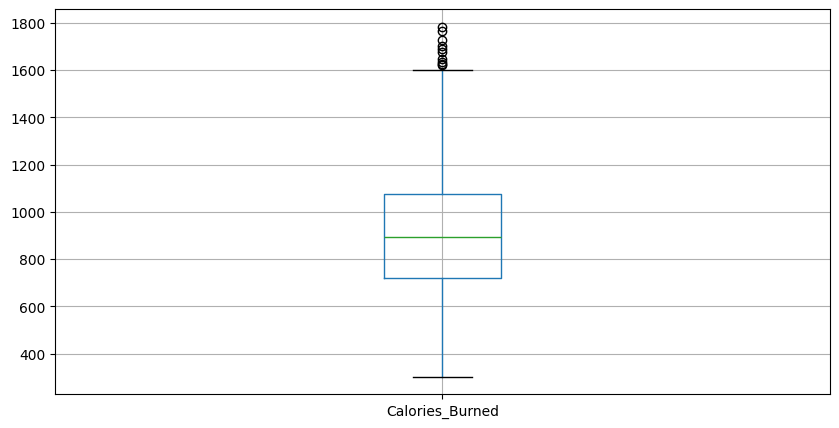

In [77]:

# Create a boxplot for the specified columns with the given figure size
df[['Calories_Burned']].boxplot(figsize=(10, 5))

# Display the plot
plt.show()


<Axes: ylabel='Frequency'>

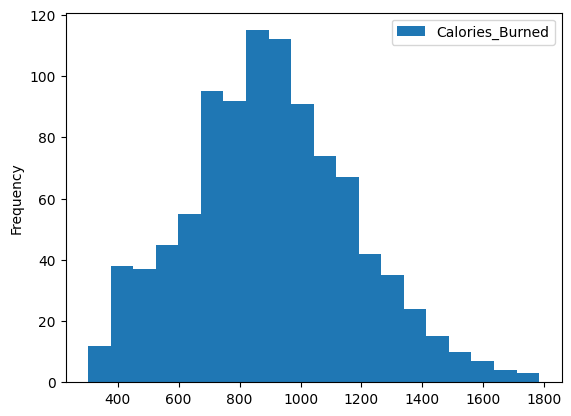

In [88]:
df[['Calories_Burned']].plot.hist(bins=20) #show distribution

#Correlation: The values in a correlation heatmap showed the correlation coefficient between two variables. 
Positive Values: Values between 0 and 1 indicate a positive correlation (as one variable increases, the other increases proportionally).
Negative Values: Values between 0 and -1 indicate a negative correlation (as one variable increases, the other decreases proportionally).

In [89]:
df.corr(numeric_only=True) #show correlation

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


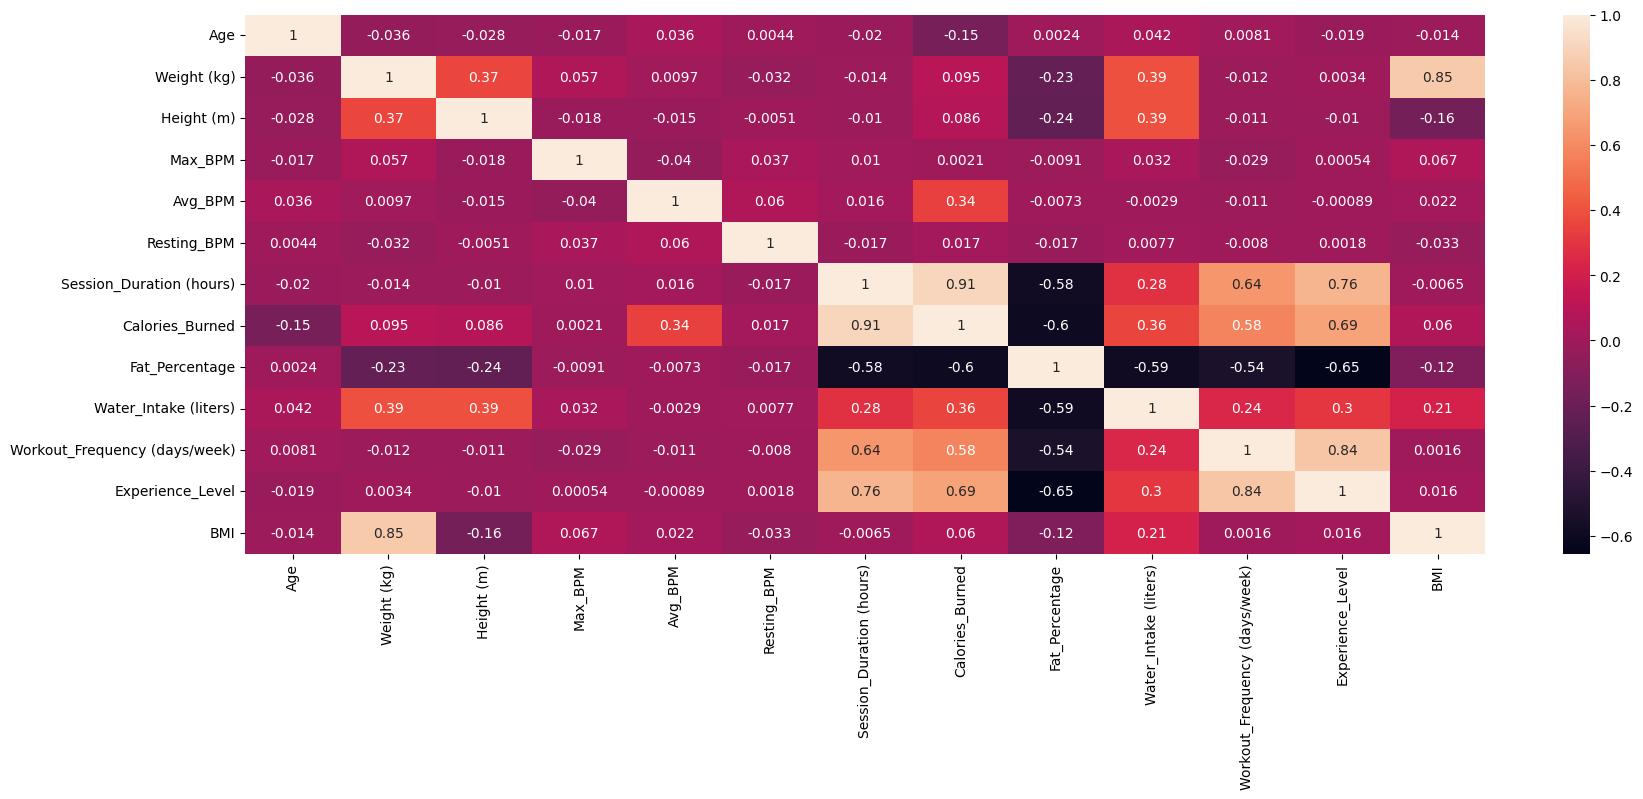

In [90]:
plt.figure(figsize=(20, 7)) ##put plt.figure, followed with heatmap, show correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Simple Linear Regression (SLR) is applied to model the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). The objective of simple linear regression is to find a linear relationship that best predicts the dependent variable based on the independent variable.

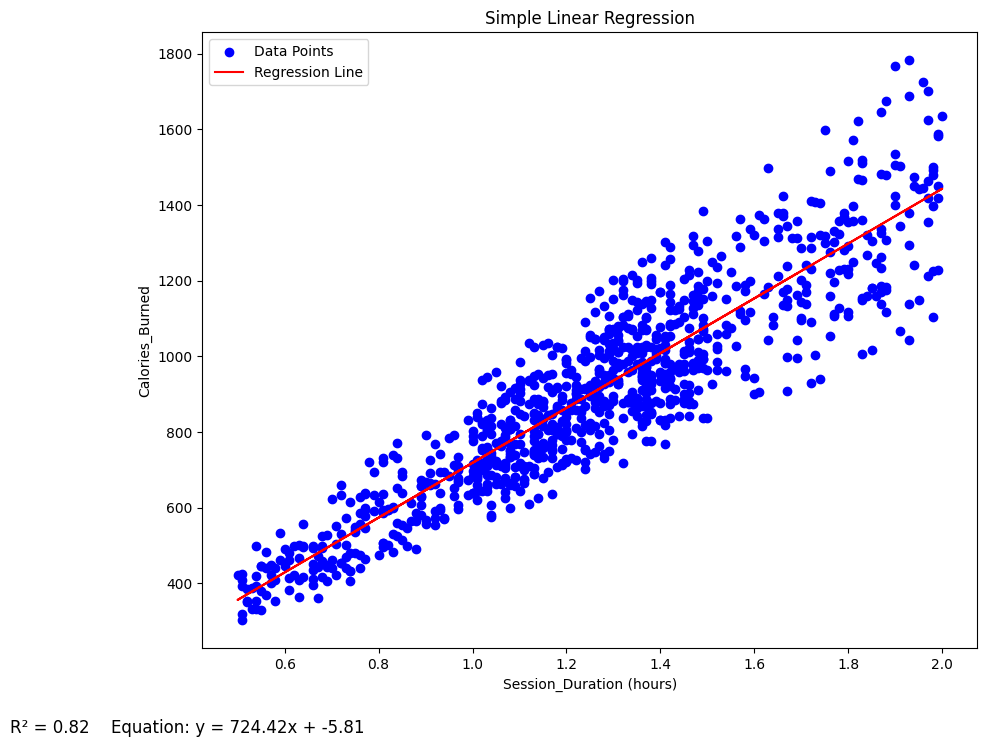

In [105]:
##Create simple linear regression
#In this case, R² of 0.82 indicates a strong relationship between the independent variables and the dependent variable

# Features (X) and Target (y)
X = df[['Session_Duration (hours)']]
y = df['Calories_Burned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

# Get the slope (m) and intercept (b) from the model
slope = model.coef_[0]
intercept = model.intercept_

# Plotting the data points and regression line
plt.figure(figsize=(10, 8))

# Scatter plot for the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Display the R² value on the plot
plt.text(0.1, 4.5, f'R² = {r2:.2f}', fontsize=12, color='black', ha='center')

# Display the formula on the plot
plt.text(0.5, 5, f'Equation: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='black', ha='center')

# Adding labels and title
plt.xlabel('Session_Duration (hours)')
plt.ylabel('Calories_Burned')
plt.title('Simple Linear Regression')
plt.legend()

# Show the plot
plt.show()


Multiple Linear Regression is applied to model the relationship between a dependent variable and two or more independent variables. The objective is to predict the value of the dependent variable based on the values of the independent variables.

In [106]:
##Create Multiple Linear Regression

# Features (X) and Target (y)
X = df[['Session_Duration (hours)', 'Fat_Percentage', 'Experience_Level']]  # Multiple independent variables
y = df['Calories_Burned']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

# Get the coefficients and intercept from the model
coefficients = model.coef_
intercept = model.intercept_


# Print the coefficients and intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [697.21828574  -5.74293722 -20.68871567]
Intercept: 209.5328594214393
